In [1]:
import numpy as np
import pandas as pd
import os
pd.set_option('display.max_columns', None)
from sklearn.linear_model import Lasso,SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,BaggingRegressor,VotingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.base import BaseEstimator,TransformerMixin
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from date_transformer import DateTransformer
import urllib

PROJECT_ROOT="."
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/chugh007/FlightPricePrediction/master/"
dataset_path = os.path.join(PROJECT_ROOT,"dataset","downloaded_dataset")
DATASET_URL = DOWNLOAD_ROOT + os.path.join("dataset","Data_Train.xlsx")
DATASET_URL


'https://raw.githubusercontent.com/chugh007/FlightPricePrediction/master/dataset/Data_Train.xlsx'

In [2]:
def fetch_dataset(url=DATASET_URL,path=dataset_path):
    os.makedirs(dataset_path,exist_ok=True)
    file_path = os.path.join(path,"Data_Train.xlsx")
    print("Downloading the dataset from {}".format(url))
    urllib.request.urlretrieve(url,file_path)
    return pd.read_excel(file_path)


In [4]:
data = fetch_dataset()
airline = data.copy()
airline

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [5]:
airline.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
airline.dropna(inplace=True)

In [7]:
airline.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
airline.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [9]:
airline['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
airline['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [11]:
airline['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [12]:
airline['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [13]:
airline['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [14]:
o = OrdinalEncoder()
new_f = o.fit_transform(airline[['Total_Stops','Additional_Info']][:10])
new_f

array([[2., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [2., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.]])

In [15]:
o.inverse_transform(new_f)

array([['non-stop', 'No info'],
       ['2 stops', 'No info'],
       ['2 stops', 'No info'],
       ['1 stop', 'No info'],
       ['1 stop', 'No info'],
       ['non-stop', 'No info'],
       ['1 stop', 'In-flight meal not included'],
       ['1 stop', 'No info'],
       ['1 stop', 'In-flight meal not included'],
       ['1 stop', 'No info']], dtype=object)

In [16]:
one_hot = OneHotEncoder()
new_f = one_hot.fit_transform(airline[['Total_Stops']])
new_f

<10682x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10682 stored elements in Compressed Sparse Row format>

In [17]:
one_hot.inverse_transform(new_f)

array([['non-stop'],
       ['2 stops'],
       ['2 stops'],
       ...,
       ['non-stop'],
       ['non-stop'],
       ['2 stops']], dtype=object)

In [18]:
counts = airline['Destination'].value_counts()
new_df = airline.loc[airline['Destination'].isin(counts.index[counts > 10])]
new_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [17]:
airline.shape

(10682, 11)

We will mark the categories which have occurred very less than threshold as Rare

In [19]:


class RareCategories(BaseEstimator,TransformerMixin):
    """
    delete rare categories with unknown , less than threshold
    if threshold is in fraction , then replace the percent of categories
    else take absolute number
    """
    def __init__(self,threshold=10):
        self.threshold = threshold
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        newx = X.copy()
        for f in newx.columns:
            if (newx[f].dtype == 'object' or newx[f].dtype == 'O') and len(newx[f].unique()) < 30:
            #newx.drop(index = self.rare_dict[f],inplace=True,errors='ignore')
                #print(f)
                counts = newx[f].value_counts()
                newx = newx.loc[newx[f].isin(counts.index[counts > self.threshold])]
            #newx[f] = np.where(newx[f].isin(self.rare_dict[f]),'RARE',newx[f])
        return newx
    
airline = RareCategories().fit_transform(airline)
airline

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10658 rows x 11 columns]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(airline.drop('Price',axis=1),airline['Price'].copy(),test_size=0.2,random_state=42)
X_train.shape

(8526, 10)

In [21]:
airline.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [22]:
X_train.head()

Airline Date_of_Journey   Source Destination  \
7653          Air India      12/06/2019  Kolkata    Banglore   
3045  Multiple carriers       9/04/2019    Delhi      Cochin   
4066           SpiceJet      21/03/2019   Mumbai   Hyderabad   
2489        Jet Airways       6/03/2019    Delhi      Cochin   
6735        Jet Airways       9/06/2019    Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
7653        CCU → DEL → BLR    17:30  20:25 13 Jun  26h 55m      1 stop   
3045        DEL → BOM → COK    10:35         19:15   8h 40m      1 stop   
4066              BOM → HYD    22:45  00:10 22 Mar   1h 25m    non-stop   
2489        DEL → BOM → COK    08:00  04:25 07 Mar  20h 25m      1 stop   
6735  DEL → JAI → BOM → COK    19:30  04:25 10 Jun   8h 55m     2 stops   

                  Additional_Info  
7653                      No info  
3045                      No info  
4066                      No info  
2489  In-flight meal not included  
6735                      No info

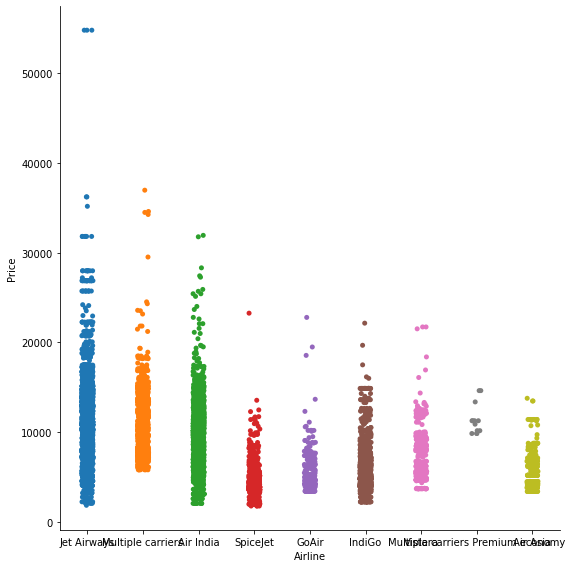

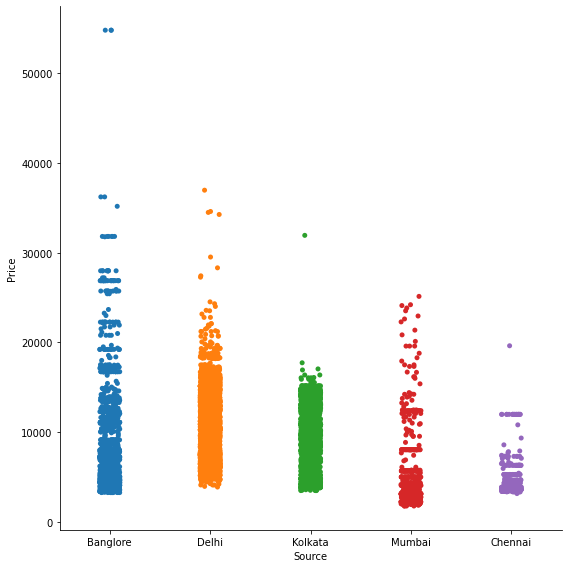

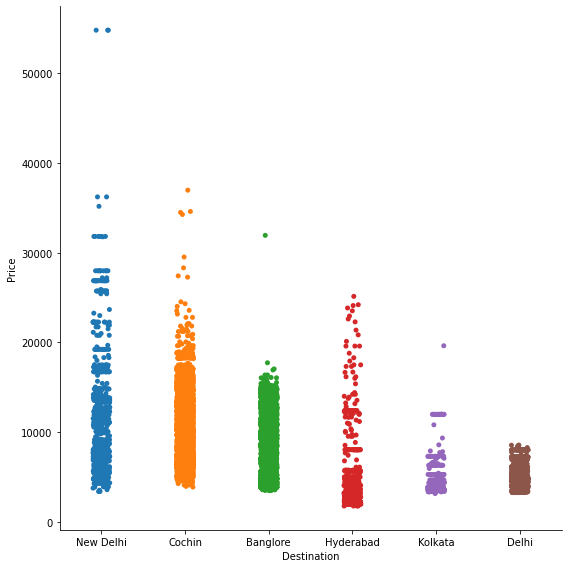

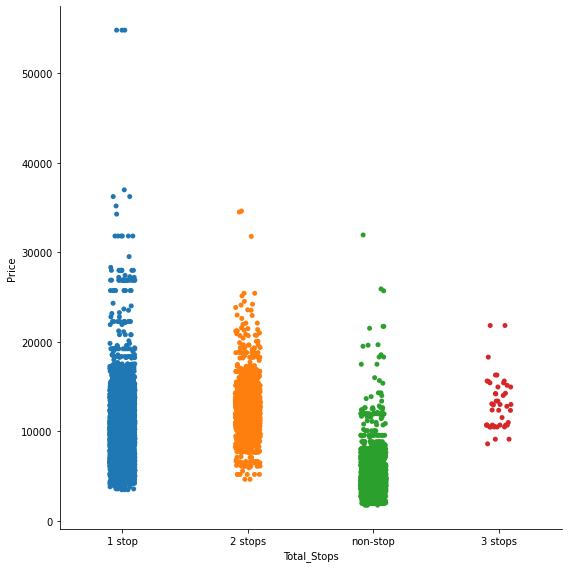

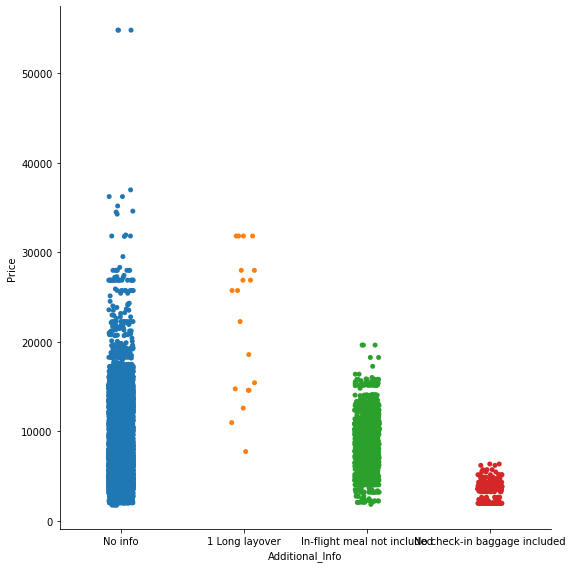

In [23]:
cat_features = ['Airline','Source','Destination','Total_Stops','Additional_Info']
for f in cat_features:
    sns.catplot(x=f,y='Price',data=airline.sort_values('Price',ascending=False),height=8)
    #airline.groupby(f)['Price'].mean().plot.bar()
    plt.show()

In [24]:
instances = X_train.groupby('Airline')['Airline'].count()
instances[instances < 10].index
X_train.drop(index=instances[instances < 10].index,columns=['Airline'])

Date_of_Journey    Source Destination                  Route Dep_Time  \
7653      12/06/2019   Kolkata    Banglore        CCU → DEL → BLR    17:30   
3045       9/04/2019     Delhi      Cochin        DEL → BOM → COK    10:35   
4066      21/03/2019    Mumbai   Hyderabad              BOM → HYD    22:45   
2489       6/03/2019     Delhi      Cochin        DEL → BOM → COK    08:00   
6735       9/06/2019     Delhi      Cochin  DEL → JAI → BOM → COK    19:30   
...              ...       ...         ...                    ...      ...   
5746      24/06/2019  Banglore       Delhi              BLR → DEL    17:45   
5202      15/06/2019     Delhi      Cochin        DEL → BOM → COK    04:55   
5402       9/06/2019     Delhi      Cochin  DEL → AMD → BOM → COK    19:45   
864       18/05/2019     Delhi      Cochin        DEL → BLR → COK    17:40   
7282       3/06/2019  Banglore       Delhi              BLR → DEL    23:55   

      Arrival_Time Duration Total_Stops              Additional_Info  
7653  20:25 13 Jun  26h 55m      1 stop                      No info  
3045         19:15   8h 40m      1 stop                      No info  
4066  00:10 22 Mar   1h 25m    non-stop                      No info  
2489  04:25 07 Mar  20h 25m      1 stop  In-flight meal not included  
6735  04:25 10 Jun   8h 55m     2 stops                      No info  
...            ...      ...         ...                          ...  
5746         20:45       3h    non-stop                      No info  
5202         19:00   14h 5m      1 stop                      No info  
5402  19:15 10 Jun  23h 30m     2 stops                      No info  
864          23:00   5h 20m      1 stop                      No info  
7282  02:45 04 Jun   2h 50m    non-stop                      No info  

[8526 rows x 9 columns]

In [478]:


RareCategories(threshold=10).fit_transform(X_train)['Additional_Info'].value_counts()

No info                         6708
In-flight meal not included     1549
No check-in baggage included     254
1 Long layover                    15
Name: Additional_Info, dtype: int64

In [479]:
X_train['Airline'].dtype == 'O'

True

In [490]:

cat_pipeline = ColumnTransformer([
    ('one_hot',OneHotEncoder(),['Airline','Source','Destination']),
    ('ordinal_encoder',OrdinalEncoder(),['Total_Stops','Additional_Info']),
    ('drop_features','drop',['Route'])
])

pd.DataFrame(cat_pipeline.fit_transform(X_train).toarray())

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   
3     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8521  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
8522  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8523  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8524  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8525  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

       14   15   16   17   18   19   20   21  
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  3.0  
2     0.0  0.0  0.0  1.0  0.0  0.0  3.0  3.0  
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  
4     0.0  1.0  0.0  0.0  0.0  0.0  1.0  3.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
8521  0.0  0.0  1.0  0.0  0.0  0.0  3.0  3.0  
8522  0.0  1.0  0.0  0.0  0.0  0.0  0.0  3.0  
8523  0.0  1.0  0.0  0.0  0.0  0.0  1.0  3.0  
8524  0.0  1.0  0.0  0.0  0.0  0.0  0.0  3.0  
8525  0.0  0.0  1.0  0.0  0.0  0.0  3.0  3.0  

[8526 rows x 22 columns]

In [29]:
X_train.head()

NameError: name 'X_train' is not defined

In [144]:
DateTransformer().fit_transform(X_train)

Airline    Source Destination                  Route  \
10005  Multiple carriers     Delhi      Cochin        DEL → BOM → COK   
3684         Jet Airways     Delhi      Cochin        DEL → BOM → COK   
1034            SpiceJet     Delhi      Cochin        DEL → MAA → COK   
3909   Multiple carriers     Delhi      Cochin        DEL → BOM → COK   
3088           Air India     Delhi      Cochin  DEL → HYD → BOM → COK   
...                  ...       ...         ...                    ...   
5734         Jet Airways     Delhi      Cochin        DEL → BOM → COK   
5191         Jet Airways   Kolkata    Banglore        CCU → BOM → BLR   
5390   Multiple carriers     Delhi      Cochin        DEL → BOM → COK   
860               IndiGo  Banglore   New Delhi              BLR → DEL   
7270         Jet Airways     Delhi      Cochin        DEL → BOM → COK   

      Total_Stops              Additional_Info  Date_of_Journey_year  \
10005      1 stop                      No info                     1   
3684       1 stop  In-flight meal not included                     1   
1034       1 stop                      No info                     1   
3909       1 stop                      No info                     1   
3088      2 stops                      No info                     1   
...           ...                          ...                   ...   
5734       1 stop                      No info                     1   
5191       1 stop  In-flight meal not included                     1   
5390       1 stop                      No info                     1   
860      non-stop                      No info                     1   
7270       1 stop  In-flight meal not included                     1   

       Date_of_Journey_month  Date_of_Journey_day  Dep_Time_hour  \
10005                      5                   27              8   
3684                       9                    5             11   
1034                       4                   24             15   
3909                       3                   21             12   
3088                       6                   24             17   
...                      ...                  ...            ...   
5734                       3                   27              9   
5191                       9                    5             14   
5390                       5                   15             12   
860                        3                    3              0   
7270                       1                    6             13   

       Dep_Time_minute  Arrival_Time_hour  Arrival_Time_minute Duration_hour  \
10005               30                 19                   15            10   
3684                30                 12                   35            25   
1034                45                 22                    5             6   
3909                50                  1                   35            12   
3088                15                 19                   15            26   
...                ...                ...                  ...           ...   
5734                 0                  4                   25            19   
5191                 5                 20                   45             6   
5390                50                  1                   30            12   
860                 40                  3                   25             2   
7270                 0                  4                   25            15   

      Duration_min  
10005           45  
3684             5  
1034            20  
3909            45  
3088             0  
...            ...  
5734            25  
5191            40  
5390            40  
860             45  
7270            25  

[8545 rows x 15 columns]

In [491]:
preprocess_pipeline = Pipeline([
    ('date_attribs',DateTransformer()),
    ('cat_attribs',cat_pipeline)
])

In [477]:
pd.DataFrame(preprocess_pipeline.fit_transform(X_train).toarray())

Airline
Source
Destination
Total_Stops
Additional_Info
Duration_min


0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8521  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8522  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
8523  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
8524  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
8525  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

       14   15   16   17   18   19   20  
0     0.0  1.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  1.0  0.0  0.0  0.0  0.0  1.0  
...   ...  ...  ...  ...  ...  ...  ...  
8521  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
8522  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
8523  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
8524  0.0  0.0  0.0  0.0  0.0  1.0  3.0  
8525  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[8526 rows x 21 columns]

Preprocessing is done,lets move on to the feature selection and model

In [171]:
ext_tree = ExtraTreesRegressor(n_estimators=3000).fit(preprocess_pipeline.transform(X_train),y_train)
ext_tree.score(preprocess_pipeline.transform(X_test),y_test)

0.717501570540346

In [172]:
ext_tree.feature_importances_

array([3.26204300e-03, 1.16807541e-02, 1.62243737e-03, 1.78678352e-02,
       1.33541838e-01, 9.04237250e-02, 2.89773345e-02, 1.32514539e-03,
       4.93767453e-03, 1.97949606e-04, 6.57219707e-03, 1.89860525e-04,
       9.95263964e-03, 4.91197688e-05, 4.52318682e-03, 1.98886500e-03,
       6.59045276e-03, 1.95781636e-03, 4.80994135e-03, 3.38753697e-03,
       6.44882737e-03, 4.82365420e-05, 1.83942245e-02, 5.11540352e-01,
       1.29710006e-01])

In [183]:
np.sort(ext_tree.feature_importances_)[::-1]


array([5.11540352e-01, 1.33541838e-01, 1.29710006e-01, 9.04237250e-02,
       2.89773345e-02, 1.83942245e-02, 1.78678352e-02, 1.16807541e-02,
       9.95263964e-03, 6.59045276e-03, 6.57219707e-03, 6.44882737e-03,
       4.93767453e-03, 4.80994135e-03, 4.52318682e-03, 3.38753697e-03,
       3.26204300e-03, 1.98886500e-03, 1.95781636e-03, 1.62243737e-03,
       1.32514539e-03, 1.97949606e-04, 1.89860525e-04, 4.91197688e-05,
       4.82365420e-05])

lets check feature importance with lasso regression

In [216]:
sgd = SelectFromModel(SGDRegressor(penalty="l1",alpha=1),threshold="median").fit(preprocess_pipeline.transform(X_train),y_train)
sgd.get_support().sum()

13

In [217]:
sgd.estimator_.coef_ 

array([-2346.31046061,   813.27207318, -2267.44828991, -2230.01269071,
        3760.57989554,  8065.71010096,   935.10096498,   257.89040314,
       -2194.27999276,     0.        ,  -222.60862487,     0.        ,
        1312.63281665,   696.06178662,  1001.62959105,   700.83961168,
        -104.51976257,   700.83961168,  1001.62959105,  -965.27649097,
        -104.51976257,   696.06178662,  2588.92453276,  -702.35485854,
        1030.57822592])

In [280]:
sgd_reg = SGDRegressor(penalty="l1",alpha=1e-4).fit(preprocess_pipeline.transform(X_train),y_train)

In [281]:
sgd_reg.score(preprocess_pipeline.transform(X_train),y_train)

0.5562148937928526

In [223]:
np.sqrt(mean_squared_error(sgd_reg.predict(preprocess_pipeline.transform(X_test)),y_test))

3036.774461338396

In [354]:
rnd = SelectFromModel(RandomForestRegressor(n_estimators=100),threshold="0.05*mean").fit(preprocess_pipeline.transform(X_train),y_train)


In [355]:
rnd.get_support().sum()

18

In [283]:
np.sqrt(mean_squared_error(rnd.predict(preprocess_pipeline.transform(X_train)),y_train))

2373.3844126476765

In [286]:
rnd.feature_importances_

array([2.32516835e-03, 9.86261059e-03, 1.27318906e-03, 2.53740893e-02,
       9.65548630e-02, 8.49949211e-02, 3.21235426e-02, 1.23629441e-03,
       4.68660176e-03, 2.09820572e-04, 5.25081365e-03, 1.54081116e-04,
       1.07561649e-02, 1.96557165e-04, 3.91363389e-03, 2.06351478e-03,
       6.59630660e-03, 2.13547192e-03, 3.78938690e-03, 4.90641403e-04,
       6.40419545e-03, 2.19089135e-04, 1.84742992e-02, 5.52396319e-01,
       1.28518424e-01])

In [266]:

estimators = [
    ('rnd' , RandomForestRegressor(n_estimators=1000)),
    ('grad' , GradientBoostingRegressor()),
    ('decision',DecisionTreeRegressor())
    ('linear',SGDRegressor(penalty="l1"))
]
vote = VotingRegressor(estimators).fit(preprocess_pipeline.transform(X_train),y_train)


In [267]:
np.sqrt(mean_squared_error(vote.predict(preprocess_pipeline.transform(X_test)),y_test))

2466.217268649823

In [268]:
[np.sqrt(mean_squared_error(estimator.predict(preprocess_pipeline.transform(X_test)),y_test)) for estimator in vote.estimators_]

[2479.987313922991, 2478.139628322792]

In [505]:
final_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('feature_select',SelectFromModel(RandomForestRegressor(n_estimators=500),threshold="0.05*mean")),
    ('random_forest',RandomForestRegressor(n_estimators=100))
])

#final_pipeline.fit(X_train,y_train)

In [377]:
final_pipeline.score(X_test,y_test)

0.7135218788290764

In [365]:
final_pipeline.predict(X_test[:5])

array([16220.01227354,  7650.38035916,  9287.4392003 ,  4516.437881  ,
       10647.80840793])

In [366]:
y_test[:5]

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
Name: Price, dtype: int64

In [367]:
final_pipeline.score(X_train,y_train)

0.7328935725870933

In [338]:
r = final_pipeline['random_forest']
r.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [314]:
RandomForestRegressor().

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Hyper Parameter tuning

In [514]:
params_grid = [{
    'feature_select__threshold' : ["{}*mean".format(i) for i in np.random.uniform(low=0.01,high=0.2,size=5)],
    'random_forest__criterion' : ['mae','mse'],
    'random_forest__max_depth' : list(range(2,10,2))+[None],
    'random_forest__max_leaf_nodes' : list(range(2,10,2))+[None],
    'random_forest__random_state' : [42]
}]

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'random_forest__n_estimators': n_estimators,
               'random_forest__max_features': max_features,
               'random_forest__max_depth': max_depth,
               'random_forest__min_samples_split': min_samples_split,
               'random_forest__min_samples_leaf': min_samples_leaf}
random_search = RandomizedSearchCV(final_pipeline,random_grid,cv=5, scoring="neg_mean_squared_error",verbose=3,random_state=42)

In [515]:
random_search.fit(X_train,y_train)
random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10, score=-6807871.412, total=   7.8s
[CV] random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10, score=-5248421.394, total=   8.2s
[CV] random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.9s remaining:    0.0s


[CV]  random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10, score=-5157369.159, total=   8.2s
[CV] random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10 
[CV]  random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10, score=-7307853.787, total=   7.6s
[CV] random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10 
[CV]  random_forest__n_estimators=900, random_forest__min_samples_split=5, random_forest__min_samples_leaf=5, random_forest__max_features=sqrt, random_forest__max_depth=10, score=-6226784.160, total=   8.1s
[CV] random_forest__n_estimators=11

[CV]  random_forest__n_estimators=700, random_forest__min_samples_split=5, random_forest__min_samples_leaf=10, random_forest__max_features=auto, random_forest__max_depth=20, score=-6215736.504, total=   8.9s
[CV] random_forest__n_estimators=1000, random_forest__min_samples_split=2, random_forest__min_samples_leaf=1, random_forest__max_features=sqrt, random_forest__max_depth=25 
[CV]  random_forest__n_estimators=1000, random_forest__min_samples_split=2, random_forest__min_samples_leaf=1, random_forest__max_features=sqrt, random_forest__max_depth=25, score=-6319638.378, total=   9.4s
[CV] random_forest__n_estimators=1000, random_forest__min_samples_split=2, random_forest__min_samples_leaf=1, random_forest__max_features=sqrt, random_forest__max_depth=25 
[CV]  random_forest__n_estimators=1000, random_forest__min_samples_split=2, random_forest__min_samples_leaf=1, random_forest__max_features=sqrt, random_forest__max_depth=25, score=-5138427.294, total=   9.9s
[CV] random_forest__n_estimato

[CV]  random_forest__n_estimators=700, random_forest__min_samples_split=15, random_forest__min_samples_leaf=1, random_forest__max_features=auto, random_forest__max_depth=20, score=-5143270.595, total=   9.4s
[CV] random_forest__n_estimators=700, random_forest__min_samples_split=15, random_forest__min_samples_leaf=1, random_forest__max_features=auto, random_forest__max_depth=20 
[CV]  random_forest__n_estimators=700, random_forest__min_samples_split=15, random_forest__min_samples_leaf=1, random_forest__max_features=auto, random_forest__max_depth=20, score=-5065025.087, total=   9.0s
[CV] random_forest__n_estimators=700, random_forest__min_samples_split=15, random_forest__min_samples_leaf=1, random_forest__max_features=auto, random_forest__max_depth=20 
[CV]  random_forest__n_estimators=700, random_forest__min_samples_split=15, random_forest__min_samples_leaf=1, random_forest__max_features=auto, random_forest__max_depth=20, score=-6799871.905, total=   8.2s
[CV] random_forest__n_estimato

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


{'random_forest__n_estimators': 700,
 'random_forest__min_samples_split': 15,
 'random_forest__min_samples_leaf': 1,
 'random_forest__max_features': 'auto',
 'random_forest__max_depth': 20}

In [521]:
random_grid = [{
    'feature_select__threshold' : ["{}*mean".format(i) for i in np.random.uniform(low=0.01,high=0.2,size=5)],
}]

rnd = GridSearchCV(random_search.best_estimator_,random_grid,cv=5, scoring="neg_mean_squared_error",verbose=3)
rnd.fit(X_train,y_train)
rnd.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] feature_select__threshold=0.024199598213299468*mean .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_select__threshold=0.024199598213299468*mean, score=-6285454.087, total=   9.5s
[CV] feature_select__threshold=0.024199598213299468*mean .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV]  feature_select__threshold=0.024199598213299468*mean, score=-5132173.270, total=   9.9s
[CV] feature_select__threshold=0.024199598213299468*mean .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.4s remaining:    0.0s


[CV]  feature_select__threshold=0.024199598213299468*mean, score=-5030234.138, total=   9.4s
[CV] feature_select__threshold=0.024199598213299468*mean .............
[CV]  feature_select__threshold=0.024199598213299468*mean, score=-6732920.498, total=   9.3s
[CV] feature_select__threshold=0.024199598213299468*mean .............
[CV]  feature_select__threshold=0.024199598213299468*mean, score=-5963683.512, total=   9.2s
[CV] feature_select__threshold=0.014913734378366206*mean .............
[CV]  feature_select__threshold=0.014913734378366206*mean, score=-6283270.889, total=   9.6s
[CV] feature_select__threshold=0.014913734378366206*mean .............
[CV]  feature_select__threshold=0.014913734378366206*mean, score=-5137790.765, total=  10.5s
[CV] feature_select__threshold=0.014913734378366206*mean .............
[CV]  feature_select__threshold=0.014913734378366206*mean, score=-5028413.428, total=   9.9s
[CV] feature_select__threshold=0.014913734378366206*mean .............
[CV]  feature_se

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.7min finished


{'feature_select__threshold': '0.024199598213299468*mean'}

In [522]:
np.sqrt(-rnd.best_score_)

2414.310067306919

In [523]:
best_pipeline =  Pipeline([
    ('preprocess',preprocess_pipeline),
    ('feature_select',SelectFromModel(RandomForestRegressor(n_estimators=500),threshold='0.024199598213299468*mean')),
    ('random_forest',RandomForestRegressor(n_estimators=700,
                                           min_samples_split=15,
                                           min_samples_leaf=1,
                                           max_features='auto',
                                           max_depth=20 ))
])

In [524]:
best_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('date_attribs', DateTransformer()),
                                 ('cat_attribs',
                                  ColumnTransformer(transformers=[('one_hot',
                                                                   OneHotEncoder(),
                                                                   ['Airline',
                                                                    'Source',
                                                                    'Destination']),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(),
                                                                   ['Total_Stops',
                                                                    'Additional_Info']),
                                                                  ('drop_features',
                   

In [525]:
best_pipeline.score(X_test,y_test)

0.7221680308012086

In [527]:
rmse = np.sqrt(mean_squared_error(best_pipeline.predict(X_test),y_test))

In [528]:
rmse

2380.4294133742023

In [533]:
import joblib

os.makedirs("model",exist_ok=True)

In [535]:
joblib.dump(best_pipeline,os.path.join("model","best_model.pkl"))

['model/best_model.pkl']